## Medical Insurance Premium Prediction

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
ignore = warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid')


In [5]:
df = pd.read_csv('Medicalpremium.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [6]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [8]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


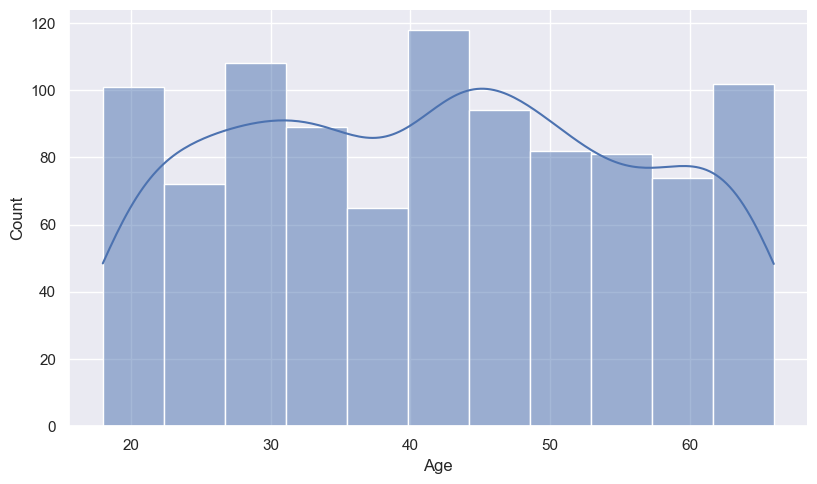

In [15]:
# Distribution of the data for Age
sns.displot(x='Age',data=df,kind='hist',aspect=10/6,kde=True)

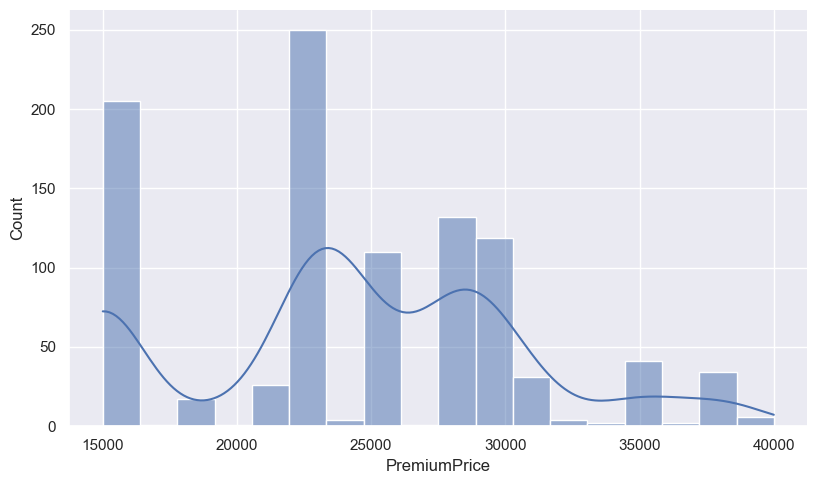

In [17]:
# Distribution of the data for Premium
sns.displot(x='PremiumPrice',data=df,kind='hist',aspect=10/6,kde=True)

In [20]:
#Binning
pr_lab= ['Basic', 'Standard', 'Elevated', 'Intense', 'Extreme']
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)
df['AgeLabel']=pr_bins=pd.cut(df['Age'],bins=5,labels=pr_lab,precision=0)
df['WeightLabel']=pr_bins=pd.cut(df['Weight'],bins=5,labels=pr_lab,precision=0)
df['HeightLabel']=pr_bins=pd.cut(df['Height'],bins=5,labels=pr_lab,precision=0)

In [21]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel', 'AgeLabel', 'WeightLabel', 'HeightLabel'],
      dtype='object')

In [22]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,AgeLabel,WeightLabel,HeightLabel
0,45,0,0,0,0,155,57,0,0,0,25000,Standard,Elevated,Basic,Standard
1,60,1,0,0,0,180,73,0,0,0,29000,Elevated,Extreme,Standard,Extreme
2,36,1,1,0,0,158,59,0,0,1,23000,Standard,Standard,Basic,Standard
3,52,1,1,0,1,183,93,0,0,2,28000,Elevated,Intense,Elevated,Extreme
4,38,0,0,0,1,166,88,0,0,1,23000,Standard,Elevated,Elevated,Elevated


In [23]:
df.groupby(['PremiumLabel','AnyTransplants'])['AnyTransplants'].count()

PremiumLabel  AnyTransplants
Basic         0                 213
              1                  11
Standard      0                 382
              1                   1
Elevated      0                 252
              1                   7
Intense       0                  76
              1                   2
Extreme       0                   8
              1                  34
Name: AnyTransplants, dtype: int64

<Axes: xlabel='PremiumLabel', ylabel='count'>

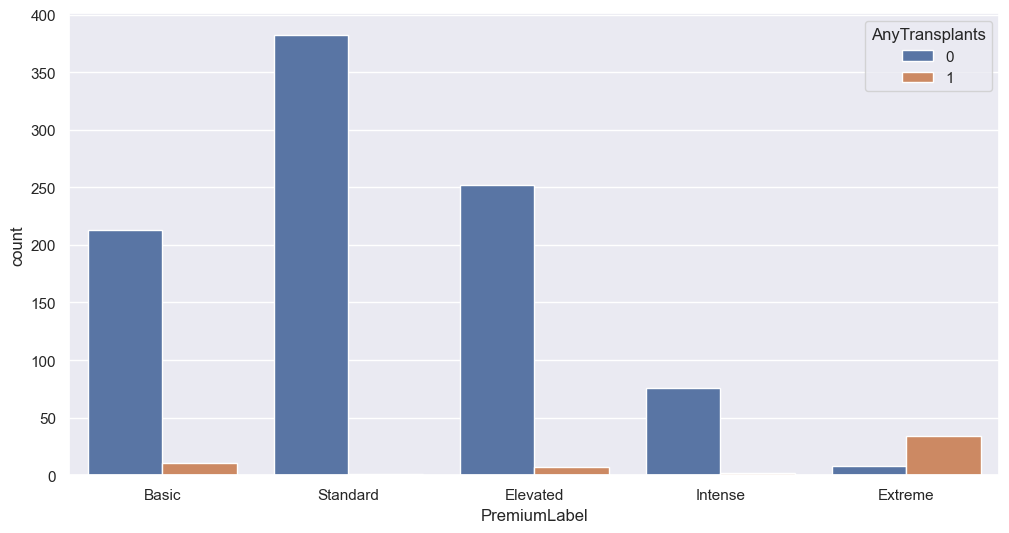

In [24]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='AnyTransplants', data=df,ax=ax)

In [25]:
df.groupby(['PremiumLabel','NumberOfMajorSurgeries'])['NumberOfMajorSurgeries'].count()

PremiumLabel  NumberOfMajorSurgeries
Basic         0                         142
              1                          82
              2                           0
              3                           0
Standard      0                         226
              1                         156
              2                           1
              3                           0
Elevated      0                          67
              1                          59
              2                         117
              3                          16
Intense       0                          22
              1                          56
              2                           0
              3                           0
Extreme       0                          22
              1                          19
              2                           1
              3                           0
Name: NumberOfMajorSurgeries, dtype: int64

<Axes: xlabel='PremiumLabel', ylabel='count'>

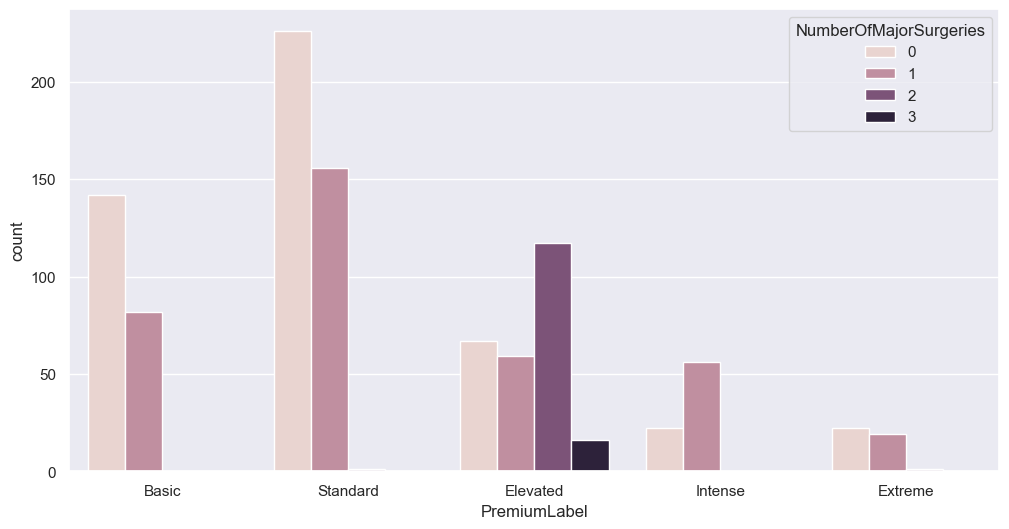

In [26]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='NumberOfMajorSurgeries', data=df,ax=ax)

<Axes: xlabel='PremiumLabel', ylabel='count'>

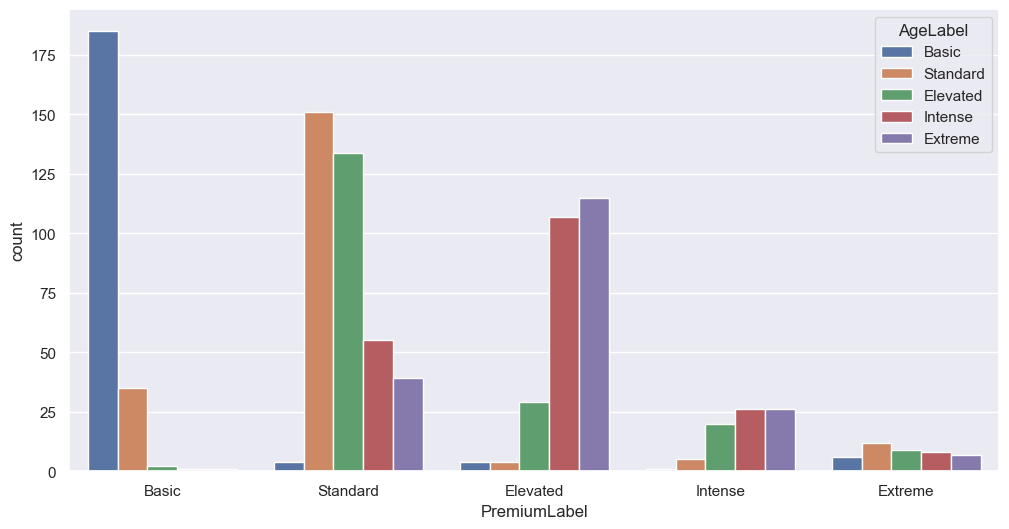

In [27]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='AgeLabel',data=df,ax=ax)

<Axes: xlabel='WeightLabel', ylabel='count'>

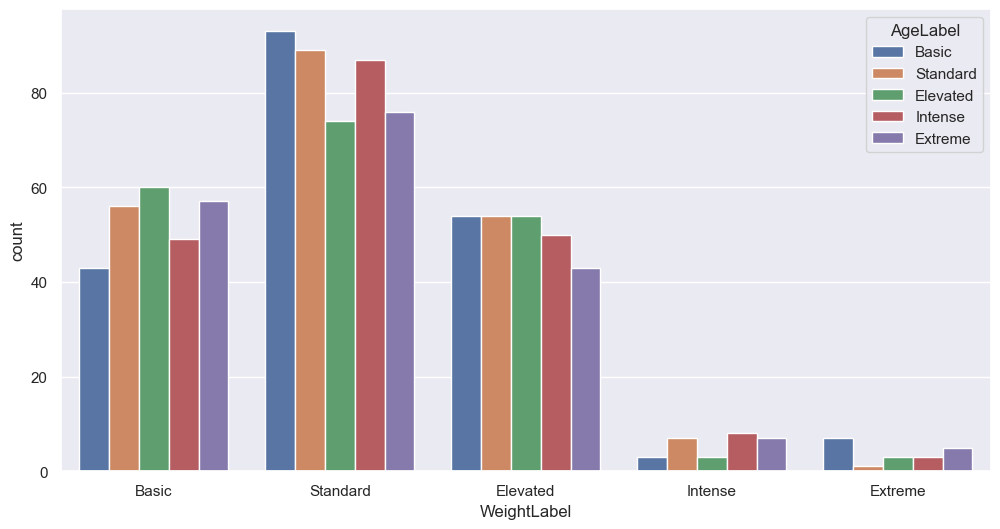

In [28]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='WeightLabel',hue='AgeLabel',data=df,ax=ax)

<Axes: xlabel='AgeLabel'>

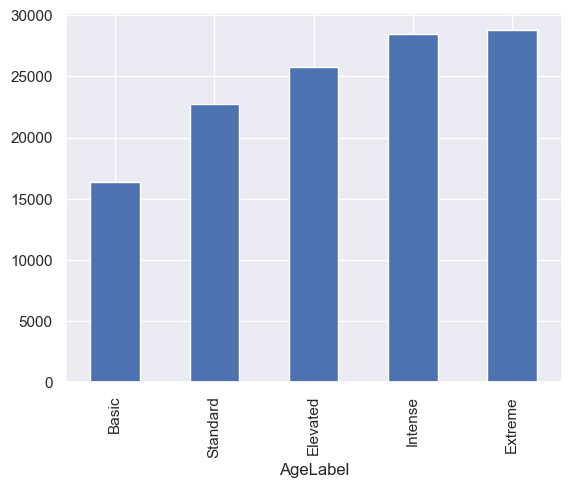

In [29]:
df.groupby(['AgeLabel'])['PremiumPrice'].mean().plot(kind='bar')

In [30]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel', 'AgeLabel', 'WeightLabel', 'HeightLabel'],
      dtype='object')

In [31]:
df=pd.get_dummies(data=df,columns=['AgeLabel','PremiumLabel','WeightLabel', 'HeightLabel'])

In [32]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'AgeLabel_Basic', 'AgeLabel_Standard', 'AgeLabel_Elevated',
       'AgeLabel_Intense', 'AgeLabel_Extreme', 'PremiumLabel_Basic',
       'PremiumLabel_Standard', 'PremiumLabel_Elevated',
       'PremiumLabel_Intense', 'PremiumLabel_Extreme', 'WeightLabel_Basic',
       'WeightLabel_Standard', 'WeightLabel_Elevated', 'WeightLabel_Intense',
       'WeightLabel_Extreme', 'HeightLabel_Basic', 'HeightLabel_Standard',
       'HeightLabel_Elevated', 'HeightLabel_Intense', 'HeightLabel_Extreme'],
      dtype='object')

In [34]:
#New Shape of the data
df.shape

(986, 31)

In [35]:
# Getting Features and Target datasets
X=df.drop(['PremiumPrice'],axis=1)
y=df['PremiumPrice']

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(X)

In [39]:
xsc=pd.DataFrame(xsc,columns=X.columns)

In [40]:
xsc

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,...,WeightLabel_Basic,WeightLabel_Standard,WeightLabel_Elevated,WeightLabel_Intense,WeightLabel_Extreme,HeightLabel_Basic,HeightLabel_Standard,HeightLabel_Elevated,HeightLabel_Intense,HeightLabel_Extreme
0,0.233197,-0.850750,-0.938978,-0.243056,-0.469358,-1.306105,-1.399250,-0.523356,-0.365148,-0.891187,...,1.649471,-0.859638,-0.590624,-0.170961,-0.140173,-0.307148,1.976227,-0.629762,-0.612515,-0.425251
1,1.307981,1.175433,-0.938978,-0.243056,-0.469358,1.170852,-0.277062,-0.523356,-0.365148,-0.891187,...,-0.606255,1.163281,-0.590624,-0.170961,-0.140173,-0.307148,-0.506015,-0.629762,-0.612515,2.351553
2,-0.411674,1.175433,1.064988,-0.243056,-0.469358,-1.008870,-1.258976,-0.523356,-0.365148,0.444239,...,1.649471,-0.859638,-0.590624,-0.170961,-0.140173,-0.307148,1.976227,-0.629762,-0.612515,-0.425251
3,0.734763,1.175433,1.064988,-0.243056,2.130569,1.468086,1.125674,-0.523356,-0.365148,1.779665,...,-0.606255,-0.859638,1.693123,-0.170961,-0.140173,-0.307148,-0.506015,-0.629762,-0.612515,2.351553
4,-0.268369,-0.850750,-0.938978,-0.243056,2.130569,-0.216244,0.774990,-0.523356,-0.365148,0.444239,...,-0.606255,-0.859638,1.693123,-0.170961,-0.140173,-0.307148,-0.506015,1.587901,-0.612515,-0.425251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,-1.701415,-0.850750,-0.938978,-0.243056,-0.469358,0.080991,-0.697882,-0.523356,-0.365148,-0.891187,...,1.649471,-0.859638,-0.590624,-0.170961,-0.140173,-0.307148,-0.506015,1.587901,-0.612515,-0.425251
982,1.594590,1.175433,1.064988,-0.243056,-0.469358,-1.504261,-0.487472,-0.523356,-0.365148,3.115090,...,-0.606255,1.163281,-0.590624,-0.170961,-0.140173,3.255764,-0.506015,-0.629762,-0.612515,-0.425251
983,1.021372,-0.850750,1.064988,-0.243056,-0.469358,-1.306105,-0.417335,-0.523356,-0.365148,0.444239,...,-0.606255,1.163281,-0.590624,-0.170961,-0.140173,-0.307148,1.976227,-0.629762,-0.612515,-0.425251
984,0.376502,1.175433,1.064988,-0.243056,-0.469358,-1.008870,-0.277062,1.910744,-0.365148,0.444239,...,-0.606255,1.163281,-0.590624,-0.170961,-0.140173,-0.307148,1.976227,-0.629762,-0.612515,-0.425251


In [41]:
# Selecing the best features using RFE 15
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(xsc,y)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=xsc.columns)
mi_scores = mi_scores.sort_values(ascending=False)
(mi_scores*100).head(15).index

Index(['Age', 'PremiumLabel_Standard', 'PremiumLabel_Elevated',
       'PremiumLabel_Basic', 'NumberOfMajorSurgeries', 'AgeLabel_Basic',
       'PremiumLabel_Intense', 'Weight', 'PremiumLabel_Extreme',
       'AgeLabel_Extreme', 'AgeLabel_Elevated', 'AnyChronicDiseases',
       'AgeLabel_Standard', 'AgeLabel_Intense', 'HistoryOfCancerInFamily'],
      dtype='object')

In [42]:
fea=list((mi_scores*100).head(15).index)
xsc=xsc[fea]

In [43]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xsc,y,test_size=0.3,random_state=42)

In [48]:
#ML Algortijm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [49]:
clf1=LinearRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()
clf4=SVC()
clf5=GaussianNB()

In [54]:
models = [clf1, clf2, clf3, clf4, clf5]
accuracy = {}
for model in models:
    model.fit(xtrain,ytrain)
    
    accuracy[model] = model.score(xtest,ytest)
    print(model.score(xtest,ytest))


0.9813445259786084
0.9459459459459459
0.9628378378378378
0.918918918918919
0.7635135135135135


In [55]:
accuracy

{LinearRegression(): 0.9813445259786084,
 DecisionTreeClassifier(): 0.9459459459459459,
 RandomForestClassifier(): 0.9628378378378378,
 SVC(): 0.918918918918919,
 GaussianNB(): 0.7635135135135135}

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(ytest,clf1.predict(xtest))

0.9813445259786084